In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [84]:
df_emp = pd.read_csv('./employees.csv')
df_attendance=pd.read_csv('./attendance.csv')
df_holidays=pd.read_csv('./holidays.csv')
df_leaves=pd.read_csv('./leaves.csv')
df_salary=pd.read_csv('./salary.csv')

C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [85]:
df_emp

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [86]:
# Since the Employee_No is a primary key. We set it as the index.
df_emp.set_index('Employee_No', inplace=True)
df_emp

,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
Employee_No,,,,,,,,,,,,,,,,,,
347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997


In [87]:
# Employee_code and Name are not important for a machine learning model
df_emp.drop(columns=['Employee_Code'], inplace=True)
df_emp.drop(columns=['Name', 'Title'], inplace=True)

df_emp

,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
Employee_No,,,,,,,,,,,,,,,
347,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
348,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
349,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
351,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
352,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
2890,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
2972,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997


In [88]:
# Encoding gender
df_emp["Gender"] = df_emp["Gender"].map({"Male": 1, "Female": 0})


In [89]:
# Religion already has an id column
df_emp.drop(columns=['Religion'], inplace=True)

In [90]:
# Imputing marital status using the mode
most_frequent_marital_status = df_emp['Marital_Status'].mode()[0]
df_emp['Marital_Status'] = df_emp['Marital_Status'].fillna(
    most_frequent_marital_status)

In [91]:
# Imputing year of birth using a knn tree
df_emp['Year_of_Birth'] = pd.to_numeric(
    df_emp['Year_of_Birth'], errors='coerce')
imputer = KNNImputer(n_neighbors=1)
df_emp['Year_of_Birth'] = imputer.fit_transform(df_emp[['Year_of_Birth']])


In [92]:
# Encoding marital status
df_emp["Marital_Status"] = df_emp["Marital_Status"].map(
    {"Married": 1, "Single": 0})


In [93]:
df_emp

,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Designation,Year_of_Birth
Employee_No,,,,,,,,,,,,,,
347,1,1,1,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Driver,1965.0
348,1,1,1,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Driver,1973.0
349,1,1,1,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Account Clerk,1974.0
351,0,4,1,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Purchasing Officer,1974.0
352,1,1,1,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Store Keeper,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0,1,0,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Account Executive,1993.0
2890,1,1,0,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Quantity Surveyor,1994.0
2972,1,1,0,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Software Developer,1997.0


In [94]:
# Decoding joined date and inactive date
df_emp['Date_Joined'] = pd.to_datetime(df_emp['Date_Joined'], format='%m/%d/%Y')
df_emp['Joined_Date'] = df_emp['Date_Joined'].apply(lambda date: date.day)
df_emp['Joined_Month'] = df_emp['Date_Joined'].apply(lambda date: date.month)
df_emp['Joined_Year'] = df_emp['Date_Joined'].apply(lambda date: date.year)
# df_emp['Date_Resigned'] = pd.to_datetime(df_emp['Date_Resigned'], format='%m/%d/%Y')

In [95]:

df_emp.drop(columns=['Date_Joined'], inplace=True)
df_emp.drop(columns=['Date_Resigned'], inplace=True)

In [96]:
df_emp['Inactive_Date'].replace(['\\N', '0000-00-00'], pd.NA, inplace=True)
# df_emp['Date_Resigned'].replace(['\\N', '0000-00-00'], pd.NA, inplace=True)

In [97]:
df_emp['Inactive_Date'] = pd.to_datetime(
    df_emp['Inactive_Date'], format='%m/%d/%Y', errors='coerce')

In [98]:
df_emp['Inactive_Day'] = df_emp['Inactive_Date'].dt.day
df_emp['Inactive_Month'] = df_emp['Inactive_Date'].dt.month
df_emp['Inactive_Year'] = df_emp['Inactive_Date'].dt.year


In [99]:
df_emp.drop(columns=['Inactive_Date'], inplace=True)

In [100]:
#  Dropping Reporting_emp_2 as all values are null
df_emp.drop(columns=["Reporting_emp_2"], inplace=True)

In [101]:
# Encoding employment category
status_encoded_column = pd.get_dummies(
    df_emp['Employment_Category'], prefix='Employment_Category')
df_emp = df_emp.drop('Employment_Category', axis=1)
df_emp = df_emp.join(status_encoded_column)

In [102]:
# Encoding status
mapping = {'Active': 1, 'Inactive': 0}
df_emp["Status"] = df_emp["Status"].map(mapping)
df_emp.rename(columns={"Status": "Status"}, inplace=True)
mapping = {'Permanant': 1, 'Contarct Basis': 0}


In [103]:
# Encoding employment type
df_emp["Employment_Type"] = df_emp["Employment_Type"].map(mapping)
df_emp.rename(columns={"Employment_Type": "Employment_Type"}, inplace=True)
df_emp = df_emp.replace(True, 1)
df_emp = df_emp.replace(False, 0)

In [104]:
# Dropping Reporting_emp_1 as it has majority of null values
df_emp.drop(columns=['Reporting_emp_1'], inplace=True)


In [105]:
# Converting year of birth to int
df_emp['Year_of_Birth'] = df_emp['Year_of_Birth'].astype(int)

In [106]:
# Saving the preprocessed dataset
df_emp.to_csv('employee_preprocess_group_03.csv', index=False)


In [107]:
df_emp

,Gender,Religion_ID,Marital_Status,Designation_ID,Status,Employment_Type,Designation,Year_of_Birth,Joined_Date,Joined_Month,Joined_Year,Inactive_Day,Inactive_Month,Inactive_Year,Employment_Category_Labour,Employment_Category_Management,Employment_Category_Staff
Employee_No,,,,,,,,,,,,,,,,,
347,1,1,1,24,1,1,Driver,1965,8,12,1993,NaN,NaN,NaN,0,0,1
348,1,1,1,24,1,1,Driver,1973,14,3,1995,NaN,NaN,NaN,0,0,1
349,1,1,1,23,0,1,Account Clerk,1974,27,1,1988,28.0,6.0,2021.0,0,0,1
351,0,4,1,40,0,1,Purchasing Officer,1974,1,10,1999,31.0,1.0,2022.0,0,0,1
352,1,1,1,7,1,1,Store Keeper,1980,26,1,2001,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0,1,0,17,0,0,Account Executive,1993,1,11,2022,22.0,12.0,2022.0,0,0,1
2890,1,1,0,8,1,0,Quantity Surveyor,1994,21,11,2022,NaN,NaN,NaN,0,0,1
2972,1,1,0,201,1,0,Software Developer,1997,5,12,2022,NaN,NaN,NaN,0,0,1


In [108]:
# Assuming df is your DataFrame

# Check if all entries with '\N' values for "resigned date" have "status" as "inactive"
all_entries_inactive = sum((df_emp['Date_Resigned'] == '\\N') & (df_emp['Status'] == '1'))
# all_entries_inactive = df_emp[condition]

# if len(all_entries_inactive) == sum(df_emp['Date_Resigned'] == '\\N'):
#     print("All entries with '\\N' values for 'resigned date' have 'status' as 'inactive'.")
# else:
#     print("Not all entries with '\\N' values for 'resigned date' have 'status' as 'inactive'.")
print(all_entries_inactive)

KeyError: 'Date_Resigned'

In [109]:
df_emp['resigned_status'] = np.where((df_emp['Date_Resigned'] == '\\N') && (df_emp['Status'] == '1'), 0, 1)

SyntaxError: invalid syntax (Temp/ipykernel_24528/3037285066.py, line 1)

In [110]:
df_emp.columns

Index(['Gender', 'Religion_ID', 'Marital_Status', 'Designation_ID', 'Status',
       'Employment_Type', 'Designation', 'Year_of_Birth', 'Joined_Date',
       'Joined_Month', 'Joined_Year', 'Inactive_Day', 'Inactive_Month',
       'Inactive_Year', 'Employment_Category_Labour',
       'Employment_Category_Management', 'Employment_Category_Staff'],
      dtype='object')

In [111]:
df_emp.Date_Resigned

AttributeError: 'DataFrame' object has no attribute 'Date_Resigned'

In [112]:
df_emp

,Gender,Religion_ID,Marital_Status,Designation_ID,Status,Employment_Type,Designation,Year_of_Birth,Joined_Date,Joined_Month,Joined_Year,Inactive_Day,Inactive_Month,Inactive_Year,Employment_Category_Labour,Employment_Category_Management,Employment_Category_Staff
Employee_No,,,,,,,,,,,,,,,,,
347,1,1,1,24,1,1,Driver,1965,8,12,1993,NaN,NaN,NaN,0,0,1
348,1,1,1,24,1,1,Driver,1973,14,3,1995,NaN,NaN,NaN,0,0,1
349,1,1,1,23,0,1,Account Clerk,1974,27,1,1988,28.0,6.0,2021.0,0,0,1
351,0,4,1,40,0,1,Purchasing Officer,1974,1,10,1999,31.0,1.0,2022.0,0,0,1
352,1,1,1,7,1,1,Store Keeper,1980,26,1,2001,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0,1,0,17,0,0,Account Executive,1993,1,11,2022,22.0,12.0,2022.0,0,0,1
2890,1,1,0,8,1,0,Quantity Surveyor,1994,21,11,2022,NaN,NaN,NaN,0,0,1
2972,1,1,0,201,1,0,Software Developer,1997,5,12,2022,NaN,NaN,NaN,0,0,1


In [113]:
# Filter the DataFrame based on the status column
emp_stat_0 = df_emp[df_emp['Status'] == 0]

# Retrieve the Employee_No of employees with status 0
employee_nos_status_0 = emp_stat_0.index.tolist()

# employee_nos_status_0_sum=emp_stat_0.Employee_No.sum()

print("Employee numbers of employees with status 0:", employee_nos_status_0)

print("Sum of the Employee numbers of employees with status 0:", len(employee_nos_status_0))

Employee numbers of employees with status 0: [349, 351, 353, 359, 360, 363, 365, 366, 371, 372, 378, 379, 388, 391, 394, 399, 402, 403, 405, 407, 410, 413, 414, 415, 416, 419, 421, 422, 424, 425, 426, 433, 434, 437, 443, 444, 446, 448, 450, 451, 455, 456, 457, 460, 461, 466, 471, 475, 476, 478, 480, 482, 486, 490, 501, 504, 505, 508, 509, 510, 512, 514, 515, 520, 521, 532, 534, 536, 538, 539, 540, 541, 546, 549, 550, 553, 554, 556, 560, 561, 562, 563, 565, 569, 570, 572, 573, 574, 576, 585, 586, 589, 590, 591, 592, 594, 595, 599, 601, 603, 604, 605, 607, 608, 609, 610, 611, 614, 615, 616, 617, 618, 619, 621, 622, 625, 626, 628, 629, 630, 631, 633, 635, 638, 639, 640, 641, 642, 643, 644, 645, 649, 651, 652, 654, 655, 656, 658, 660, 662, 663, 665, 666, 667, 668, 670, 671, 672, 674, 675, 676, 677, 678, 680, 682, 683, 684, 685, 686, 689, 690, 691, 692, 693, 695, 697, 701, 702, 703, 709, 710, 711, 712, 715, 716, 719, 720, 721, 724, 726, 728, 729, 730, 731, 733, 734, 735, 737, 738, 739, 740,

Cleaning the df_attendance

In [119]:
df_attendance

,id,project_code,date,out_date,in_time,out_time,Hourly_Time,Shift_Start,Shift_End
Employee_No,,,,,,,,,
1272,280220,100.0,2/1/2021,2/1/2021,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1539,280307,1.0,2/1/2021,2/1/2021,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1540,280312,1.0,2/1/2021,2/1/2021,7:45:00,17:00:00,9.25,8:30:00,17:00:00
1273,280385,100.0,2/1/2021,2/1/2021,8:00:00,18:00:00,10,8:30:00,17:00:00
573,322526,1.0,2/1/2021,2/1/2021,23:22:28,23:22:28,0,8:30:00,17:00:00
...,...,...,...,...,...,...,...,...,...
2455,1049809,206.0,8/18/2103,8/18/2103,7:06:00,12:07:41,5.03,8:00:00,17:00:00
2453,1049810,206.0,8/18/2103,8/18/2103,6:31:00,17:15:05,10.73,8:00:00,17:00:00
2406,986797,206.0,8/19/2103,8/19/2103,7:35:41,7:35:41,0.0,0:00:00,0:00:00


In [121]:
# df_attendance.set_index('Employee_No', inplace=True)
df_attendance

,id,project_code,date,out_date,in_time,out_time,Hourly_Time,Shift_Start,Shift_End
Employee_No,,,,,,,,,
1272,280220,100.0,2/1/2021,2/1/2021,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1539,280307,1.0,2/1/2021,2/1/2021,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1540,280312,1.0,2/1/2021,2/1/2021,7:45:00,17:00:00,9.25,8:30:00,17:00:00
1273,280385,100.0,2/1/2021,2/1/2021,8:00:00,18:00:00,10,8:30:00,17:00:00
573,322526,1.0,2/1/2021,2/1/2021,23:22:28,23:22:28,0,8:30:00,17:00:00
...,...,...,...,...,...,...,...,...,...
2455,1049809,206.0,8/18/2103,8/18/2103,7:06:00,12:07:41,5.03,8:00:00,17:00:00
2453,1049810,206.0,8/18/2103,8/18/2103,6:31:00,17:15:05,10.73,8:00:00,17:00:00
2406,986797,206.0,8/19/2103,8/19/2103,7:35:41,7:35:41,0.0,0:00:00,0:00:00


In [125]:
hourly_time_dtype = df_attendance['Hourly_Time'].dtype
print(hourly_time_dtype)

object


In [127]:
df_attendance['Hourly_Time'] = df_attendance['Hourly_Time'].replace('\\N', 0)

# Convert the "Hourly_Time" column to float
df_attendance['Hourly_Time'] = df_attendance['Hourly_Time'].astype(float)

# Confirm the replacement by printing the unique values in the column
print("Unique values in Hourly_Time column after replacement:")
print(df_attendance['Hourly_Time'].unique())

Unique values in Hourly_Time column after replacement:
[ 8.5   9.25 10.   ... 19.99 22.94 24.88]


In [128]:
total_hourly_time_per_employee = df_attendance.groupby(level='Employee_No')['Hourly_Time'].sum()

print("Total Hourly_Time for each Employee_No:")
print(total_hourly_time_per_employee)

Total Hourly_Time for each Employee_No:
Employee_No
347     4061.32
348     5779.05
349      570.31
351     1162.92
352     5843.05
         ...   
3086      78.66
3087     154.79
3088      72.43
3089      18.23
3090      19.34
Name: Hourly_Time, Length: 1883, dtype: float64


In [134]:
# Reset the index of total_hourly_time_per_employee to prepare for merging
total_hourly_time_per_employee_reset = total_hourly_time_per_employee.reset_index()

# Merge df_emp with total_hourly_time_per_employee using the index (Employee_No)
df_emp_merged = pd.merge(df_emp, total_hourly_time_per_employee_reset, left_index=True, right_on='Employee_No')

print("Merged DataFrame:")
# print(df_emp_merged)


Merged DataFrame:


In [132]:
df_emp_merged

,Gender,Religion_ID,Marital_Status,Designation_ID,Status,Employment_Type,Designation,Year_of_Birth,Joined_Date,Joined_Month,Joined_Year,Inactive_Day,Inactive_Month,Inactive_Year,Employment_Category_Labour,Employment_Category_Management,Employment_Category_Staff,Employee_No,Hourly_Time
0,1,1,1,24,1,1,Driver,1965,8,12,1993,NaN,NaN,NaN,0,0,1,347,4061.32
1,1,1,1,24,1,1,Driver,1973,14,3,1995,NaN,NaN,NaN,0,0,1,348,5779.05
2,1,1,1,23,0,1,Account Clerk,1974,27,1,1988,28.0,6.0,2021.0,0,0,1,349,570.31
3,0,4,1,40,0,1,Purchasing Officer,1974,1,10,1999,31.0,1.0,2022.0,0,0,1,351,1162.92
4,1,1,1,7,1,1,Store Keeper,1980,26,1,2001,NaN,NaN,NaN,0,0,1,352,5843.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,0,1,0,17,0,0,Account Executive,1993,1,11,2022,22.0,12.0,2022.0,0,0,1,2836,302.24
1688,1,1,0,8,1,0,Quantity Surveyor,1994,21,11,2022,NaN,NaN,NaN,0,0,1,2890,433.94
1767,1,1,0,201,1,0,Software Developer,1997,5,12,2022,NaN,NaN,NaN,0,0,1,2972,187.28
1768,1,1,0,8,1,0,Quantity Surveyor,1990,8,12,2022,NaN,NaN,NaN,0,0,1,2973,221.88


In [142]:
df_emp_merged.Employment_Type.unique()

array([1, 0], dtype=int64)

Hypothesis 01

In [133]:
import scipy.stats as stats

# Assuming df_attendance is your DataFrame containing attendance data

# Filter the DataFrame for employees who have resigned (Status == 0) and those who haven't
resigned_hourly_time = df_emp_merged[df_emp_merged['Status'] == 0]['Hourly_Time']
active_hourly_time = df_emp_merged[df_emp_merged['Status'] != 0]['Hourly_Time']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(resigned_hourly_time, active_hourly_time, equal_var=False)

# Define significance level
alpha = 0.05

# Print the results
print("Two-sample t-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in hourly time between resigned and active employees.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in hourly time between resigned and active employees.")


Two-sample t-test results:
T-statistic: -13.487909877842347
P-value: 1.3525847718610062e-32
Reject the null hypothesis: There is a significant difference in hourly time between resigned and active employees.


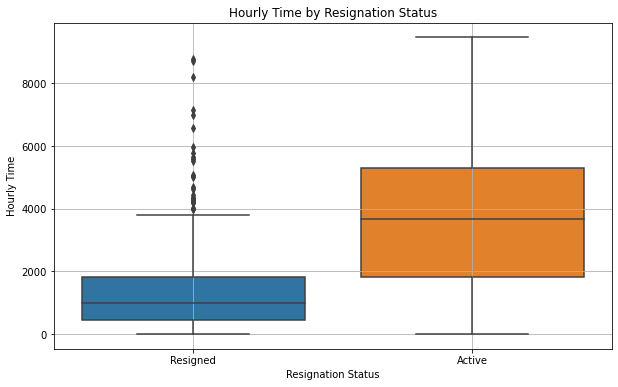

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_emp_merged['Status'], y=df_emp_merged['Hourly_Time'])
plt.xlabel("Resignation Status")
plt.ylabel("Hourly Time")
plt.title("Hourly Time by Resignation Status")
plt.xticks([0, 1], ['Resigned', 'Active'])
plt.grid(True)
plt.show()

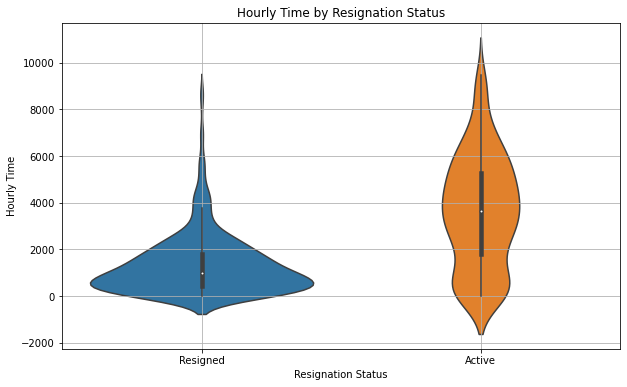

In [151]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_emp_merged['Status'], y=df_emp_merged['Hourly_Time'])
plt.xlabel("Resignation Status")
plt.ylabel("Hourly Time")
plt.title("Hourly Time by Resignation Status")
plt.xticks([0, 1], ['Resigned', 'Active'])
plt.grid(True)
plt.show()

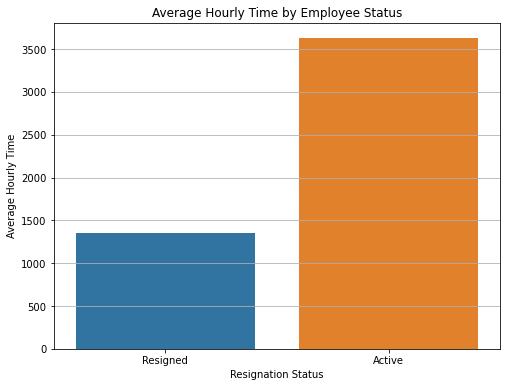

In [153]:
avg_hourly_time = df_emp_merged.groupby('Status')['Hourly_Time'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_hourly_time.index, y=avg_hourly_time.values)
plt.xlabel("Resignation Status")
plt.ylabel("Average Hourly Time")
plt.title("Average Hourly Time by Employee Status")
plt.xticks([0, 1], ['Resigned', 'Active'])
plt.grid(axis='y')
plt.show()

In [49]:
df_attendance.project_code.unique()

array([100. ,   1. , 179. , 188. , 195. , 200. , 196. , 199. , 169. ,
       187. , 190. , 189. , 194. , 205. , 198. , 184. , 182. , 193. ,
       197. , 179.1, 199.1, 194.1, 198.1, 179.2,   2. , 203. , 202. ,
       201. , 204. , 206. , 181. ])

In [50]:
df_attendance.drop(columns=['id'], inplace=True)
df_attendance.drop(columns=['project_code'], inplace=True)

In [51]:
df_attendance

,date,out_date,in_time,out_time,Hourly_Time,Shift_Start,Shift_End
Employee_No,,,,,,,
1272,2/1/2021,2/1/2021,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1539,2/1/2021,2/1/2021,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1540,2/1/2021,2/1/2021,7:45:00,17:00:00,9.25,8:30:00,17:00:00
1273,2/1/2021,2/1/2021,8:00:00,18:00:00,10,8:30:00,17:00:00
573,2/1/2021,2/1/2021,23:22:28,23:22:28,0,8:30:00,17:00:00
...,...,...,...,...,...,...,...
2455,8/18/2103,8/18/2103,7:06:00,12:07:41,5.03,8:00:00,17:00:00
2453,8/18/2103,8/18/2103,6:31:00,17:15:05,10.73,8:00:00,17:00:00
2406,8/19/2103,8/19/2103,7:35:41,7:35:41,0.0,0:00:00,0:00:00


In [72]:
# Assuming df_attendance is your DataFrame containing attendance data

# Specify the employee number
specific_employee_no = 2406

# Count the number of entries with the specific employee number
num_entries_specific_employee = len(df_attendance.loc[specific_employee_no])

print("Number of entries for employee", specific_employee_no, "in the attendance DataFrame:", num_entries_specific_employee)


Number of entries for employee 2406 in the attendance DataFrame: 316


In [52]:
df_attendance.columns

Index(['date', 'out_date', 'in_time', 'out_time', 'Hourly_Time', 'Shift_Start',
       'Shift_End'],
      dtype='object')

In [53]:
# df_holidays  #NO NEED OF USING THIS

Cleaning the df_leaves

In [54]:
df_leaves

,Employee_No,leave_date,Type,Applied Date,Remarks,apply_type
0,347,1/29/2020,Half Day,1/4/2022 15:33,\N,Anual
1,347,1/29/2020,Half Day,1/4/2022 15:33,\N,Anual
2,347,1/29/2020,Half Day,1/4/2022 15:36,\N,Anual
3,347,1/29/2020,Half Day,1/4/2022 15:36,\N,Anual
4,347,1/29/2020,Half Day,1/4/2022 18:02,\N,Anual
...,...,...,...,...,...,...
1013,596,1/27/2023,Full Day,1/31/2023 0:00,Personal,Casual
1014,596,1/28/2023,Half Day,1/31/2023 0:00,Personal,Casual
1015,2972,1/28/2023,Half Day,2/3/2023 14:00,Personal,Casual
1016,2972,1/30/2023,Full Day,2/3/2023 14:00,Personal,Casual


In [137]:
df_leaves.set_index('Employee_No', inplace=True)

In [138]:
# df_leaves.drop("Remarks")
df_leaves.drop(columns=['Remarks'], inplace=True)

In [139]:
df_leaves

,leave_date,Type,Applied Date,apply_type
Employee_No,,,,
347,1/29/2020,Half Day,1/4/2022 15:33,Anual
347,1/29/2020,Half Day,1/4/2022 15:33,Anual
347,1/29/2020,Half Day,1/4/2022 15:36,Anual
347,1/29/2020,Half Day,1/4/2022 15:36,Anual
347,1/29/2020,Half Day,1/4/2022 18:02,Anual
...,...,...,...,...
596,1/27/2023,Full Day,1/31/2023 0:00,Casual
596,1/28/2023,Half Day,1/31/2023 0:00,Casual
2972,1/28/2023,Half Day,2/3/2023 14:00,Casual


In [140]:
leave_count_per_employee = df_leaves.groupby(level='Employee_No').size()

print("Leave count per Employee_No:")
print(leave_count_per_employee)

Leave count per Employee_No:
Employee_No
347     30
348     13
351     10
356     13
373     24
        ..
2737     4
2813     1
2831     1
2972     3
3106     1
Length: 70, dtype: int64


Cleaning df_salary

In [57]:
df_salary.set_index('Employee_No', inplace=True)


In [58]:
df_salary.head(19)

,year,month,SiteNo,Area,Accomadation Allowance,Accommodation Allowance,Add. Allow. No Pay Deduction,Additional Allowance_0,Additional Allowance_2,Allow - Extra Working Hours,...,WSL No of Full Worked Days,WSL No of Half Days,WSL OT 1.5,WSL OT Hours 1.5,WSL OT Rate,WSL Total Earning,WSL Total Working Days,WSLOther Allowance Rate,Working Days - Full,Working Days - Half Day
Employee_No,,,,,,,,,,,,,,,,,,,,,
347,2021,7,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2021,8,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2021,9,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2021,10,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2021,11,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2021,12,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2022,1,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2022,2,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2022,3,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_salary.columns

Index(['year', 'month', 'SiteNo', 'Area', 'Accomadation Allowance',
       'Accommodation Allowance', 'Add. Allow. No Pay Deduction',
       'Additional Allowance_0', 'Additional Allowance_2',
       'Allow - Extra Working Hours',
       ...
       'WSL No of Full Worked Days', 'WSL No of Half Days', 'WSL OT 1.5',
       'WSL OT Hours 1.5', 'WSL OT Rate', 'WSL Total Earning',
       'WSL Total Working Days', 'WSLOther Allowance Rate',
       'Working Days - Full', 'Working Days - Half Day'],
      dtype='object', length=108)

In [60]:
df_salary.rename(columns={'Accomadation Allowance': 'acco_allow1'}, inplace=True)
df_salary.rename(columns={'Accommodation Allowance': 'acco_allow2'}, inplace=True)

In [61]:
df_salary.acco_allow1.unique()

array([   0., 5000.])

In [62]:
df_salary.acco_allow2.unique()

array([   0., 3000., 3500., 1000., 5000., 2500.])

In [63]:
df_salary.BRA1.unique()

array([   0., 1000., 2500.,   40.])

In [64]:
df_salary.BRA2.unique()

array([2500.,    0., 1000.,  100.])

In [65]:
null_columns_mask = df_salary.isnull().all()

In [66]:
null_columns = df_salary.columns[null_columns_mask]
print(null_columns)

Index([], dtype='object')


In [143]:
df_emp_2 = pd.read_csv('./employees.csv')

In [144]:
df_emp_2

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [148]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_employee is your DataFrame containing employee data with columns 'Employee_Type' and 'Status'

# Create a contingency table
contingency_table = pd.crosstab(df_emp_2['Employment_Category'], df_emp_2['Status'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between employee type and employee status.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between employee type and employee status.")
print("Contingency table:")
print(contingency_table)

Chi-square statistic: 19.420488818889872
P-value: 6.065888667228195e-05
Reject the null hypothesis: There is a significant association between employee type and employee status.
Contingency table:
Status               Active  Inactive
Employment_Category                  
Labour                  104       464
Management                6        19
Staff                   123       281


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_attendance is your DataFrame containing attendance data

# Filter the DataFrame for employees who have resigned (Status == 0) and those who haven't
resigned_hourly_time = df_emp_merged[df_emp_merged['Status'] == 0]['Hourly_Time']
active_hourly_time = df_emp_merged[df_emp_merged['Status'] != 0]['Hourly_Time']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_attendance['Status'], y=df_attendance['Hourly_Time'])
plt.xlabel("Resignation Status")
plt.ylabel("Hourly Time")
plt.title("Hourly Time by Resignation Status")
plt.xticks([0, 1], ['Resigned', 'Active'])
plt.grid(True)
plt.show()

KeyError: 'Status'

<Figure size 720x432 with 0 Axes>